# Régression linéaire, épisode I

Ce notebook est constitué de deux parties: 
* la première donne les bases théoriques et traite un exemple fictif de données avec lequel vous pourrez jouer
* la seconde vous demande de mettre le procédé précédent en application sur un exemple tiré de données réelles et pour lequel vous aurez (ou non) les points correspondants.

## Première partie: Base théoriques

### Le problème

Il arrive souvent que l'on doivent essayer d'ajuster un modèle théorique sur des données expérimentales pour en déterminer les paramètres manquant. Ici, on ne s'intéressera qu'aux régressions linéaires mais il est tout à fait possible de généraliser le procédé à des modèles plus compliqués. La grande difficulté néanmoins est d'avoir une idée de l'incertitude sur les paramètres que l'on détermine ainsi puisqu'à chaque point de mesure est associé une incertitude-type et il est normal de ne pas accorder la même confiance à un point dont l'incertitude-type est très petite comparativement à un point pour lequel elle est importante. 

### Comment faire alors pour s'en tirer ?

À la main, vous dessineriez vos points, mettriez les barres d'erreur associées et finalement regarderiez les «modèles extrêmes» qui pourraient tout de même passer par toutes les barres d'erreur. Intuitivement, cela correspond à se dire que les valeurs mesurées pourraient en fait être réparties un peu partout le long des barres d'erreur.

Informatiquement, on peut tirer une réalisation des points en rajoutant à la valeur effectivement mesurée une valeur aléatoire dont la distribution a pour écart-type l'incertitude-type associée à la mesure (et déterminée lors de la mesure). Ainsi, on se retrouve avec un *autre* jeu de mesures, similaire à celui que vous avez récolté, mais pour lequel les paramètres du modèle (typiquement le coefficient directeur et l'ordonnée à l'origine pour une régression linéaire) seront légèrement différents que ceux déterminés par l'ajustement sur les données brutes. En stockant l'ensemble des paramètres que vous avez déterminé pour autant de tirages aléatoires sur les données, vous aurez une idée de la variabilité des valeurs de ces paramètres et donc de l'incertitude-type sur la valeur de chacun des paramètres. En outre, vous pourrez vérifier que votre estimation de départ n'est pas trop mauvaise puisque, sauf cas pathologique, la valeur moyenne de la distribution devrait redonner la valeur de votre première détermination.

### Illustration sur un exemple

#### Étape préliminaire: fabrication des données

Commençons par produire des valeurs de $Y$ qui correspondent à des $X$ en suivant la loi $Y = a X + b$ où $a$ et $b$ sont connus, par exemple $a = 3$ et $b = 18$ (on va supposer que tout est sans unité sur cet exemple). Le but de tout cela est de retrouver des valeurs

Les valeurs produites sont pour le moment exactes, mais on va rajouter une petite erreur sur chaque valeur de $X$ (d'incertitude-type $u(X)$) et une petite erreur sur chaque valeur de $Y$ (d'incertitude-type $u(Y)$) en ajoutant à `X` et `Y` un tirage suivant une loi normale d'écart-type l'incertitude-type choisie.


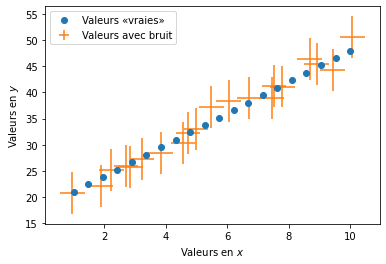

In [1]:
# Import des grandeurs nécessaires
import numpy as np
import numpy.random as rd

# Les valeurs «vraies»
a0 = 3
b0 = 18  

X0 = np.linspace(1,10,20) # On met 5 points de 1 à 10
Y0 = a0 * X0 + b0        # Les valeurs de y correspondantes

# Les incertitudes-type que l'on veut placer
u_x = 0.2
u_y = 2

# Reste à faire les tirages
X = rd.normal(X0, u_x)
Y = rd.normal(Y0, u_y)

# Un petit dessin pour voir les points originaux (en ronds) et 
# les points tirés au sort avec leurs barres d'erreur à 2sigma
# (donc deux fois l'incertitude-type) pour vérifier que les 
# points «vrais» sont bien dans les barres d'erreur
import matplotlib.pyplot as plt

plt.plot(X0, Y0, 'o', label = "Valeurs «vraies»")
plt.errorbar(X, Y, xerr = 2*u_x, yerr = 2*u_y, 
             fmt = ' ', label = "Valeurs avec bruit")
plt.xlabel('Valeurs en $x$')
plt.ylabel('Valeurs en $y$')
plt.legend()


#### 2e étape: régression linéaire originale

Pour faire la régression linéaire, on va faire un ajustement par un polynôme de degré 1 qui donne directement $a$ et $b$ en sortie via la fonction `np.polyfit` qui prend les listes des valeurs de $x$ et de $y$ en entrée, en plus du degré du polynôme que l'on espère lui ajuster (donc ici 1).

In [2]:
a, b = np.polyfit(X, Y, 1)

print('Valeur de a:', a, "au lieu de", a0)
print('Valeur de b:', b, "au lieu de", b0)


Valeur de a: 3.1694569751591923 au lieu de 3
Valeur de b: 17.237174781082285 au lieu de 18


On trouve bien des valeurs «proches» de celles attendues, mais est-ce cohérent avec les incertitudes que l'on s'est donné sur les mesures ? En d'autres termes, est-ce que les valeurs visées (par exemple 3 pour a) sont à moins de deux incertitudes-type de la valeur effectivement mesurée ? C'est là qu'intervient le tirage Monte-Carlo qu'on vous demande de savoir faire

#### 3e étape: tirage Monte-Carlo et résultats

Comme on l'a dit plus haut, on va réaliser un nombre `N` de tirages de nouvelles données *autour* des données effectivement disponibles (ici dans `X` et `Y`) en utilisant exactement le même procédé que l'on a utilisé pour «bruiter» le signal de départ. Cela revient à se dire que si l'on refaisait de nombreuses fois les mesures, on obtiendrait toujours quelque chose d'un peu différent mais toujours aux alentours des points déjà disponibles avec une certaine dispersion autour de ces points caractérisée par l'incertitude-type.

On procède donc de la manière suivante:
* Une boucle sur `N` tirages
* À chaque tour de boucle, on tire de nouvelles valeurs pour les $x$ et les $y$ autour des mesures initiales `X` et `Y`
* Pour chacun de ces nouveaux jeux de données, on récolte le $a$ et le $b$ déterminé à l'aide de `np.polyfit` et on le stocke dans une liste de valeurs
* et pour ces deux listes, on calcule à la fois la valeur moyenne (pour comparer avec la détermination faite à la deuxième étape) et l'écart-type qui nous donne ainsi l'incertitude-type sur la valeur de $a$ et $b$.

Valeur moyenne pour a: 3.155521987951774
Valeur de a 2e étape : 3.1694569751591923
Incertitude-type sur a 0.17753765342196437
--------------------
Valeur moyenne pour b: 17.309178763935105
Valeur de b 2e étape : 17.237174781082285
Incertitude-type sur b 1.0826077542844004


Text(0.5, 1.0, 'Histogramme des valeurs trouvées pour $b$')

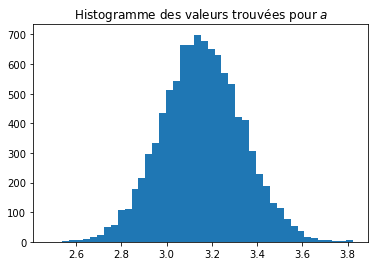

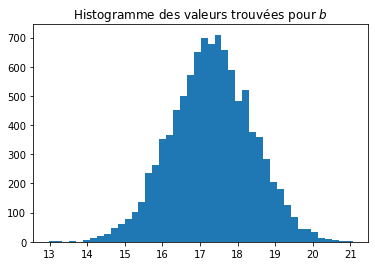

In [3]:
# Il ne faut pas être trop gourmand si on ne veut pas que
# cela prenne trop de temps
N = 10**4

# On prépare des np.array de zéros pour contenir les futures valeurs
a_MC = np.zeros(N)
b_MC = np.zeros(N)

for i in range(N):
    Xi = rd.normal(X, u_x)
    Yi = rd.normal(Y, u_y)
    ai, bi = np.polyfit(Xi, Yi, 1)
    a_MC[i] = ai
    b_MC[i] = bi

a_moyen = a_MC.mean()
b_moyen = b_MC.mean()
u_a = a_MC.std()
u_b = b_MC.std()
    
print("Valeur moyenne pour a:", a_moyen)
print("Valeur de a 2e étape :", a)
print("Incertitude-type sur a", u_a)
print("-"*20)
print("Valeur moyenne pour b:", b_moyen)
print("Valeur de b 2e étape :", b)
print("Incertitude-type sur b", u_b)

# On peut aussi regarder les histogrammes en a et en b

plt.hist(a_MC, bins = 'rice')
plt.title("Histogramme des valeurs trouvées pour $a$")

plt.figure() # Pour démarrer une nouvelle figure

plt.hist(b_MC, bins = 'rice')
plt.title("Histogramme des valeurs trouvées pour $b$")


#### 4e étape: est-on à moins de 2$\sigma$ de la valeur attendue ?

Il ne reste plus qu'à vérifier que la valeur absolue de l'écart entre la valeur mesurée et la valeur attendue est à moins de deux incertitudes-types de distance pour conclure que les résultats sont cohérents.

In [4]:
# Calcul du nombre de sigma d'écart
ecart_a_par_sigma = abs(a0 - a_moyen) / u_a
ecart_b_par_sigma = abs(b0 - b_moyen) / u_b

def verif_ecart(parametre, ecart):
    ecart = round(ecart, 1)
    texte = "La valeur de {} est à {}sigma de celle attendue."
    rempli = texte.format(parametre, ecart)
    if ecart <= 2:
        print(rempli, "VICTOIRE !")
    else:
        print(rempli, "échec...")

verif_ecart('a', ecart_a_par_sigma)
verif_ecart('b', ecart_b_par_sigma)
        

La valeur de a est à 0.9sigma de celle attendue. VICTOIRE !
La valeur de b est à 0.6sigma de celle attendue. VICTOIRE !


## Deuxième partie: mise en pratique

Il est à présent temps pour vous de mettre à la pratique.
On vous propose par la suite de lire des données pour $x$ et $y$ que l'on stocke dans des `np.array` appelés `X` et `Y` et qui sont chacun associés à une incertitude-type `u_x` et `u_y`.

Votre travail est de stocker 4 valeurs dans une variable `reponse` (SANS ACCENT) en utilisant la syntaxe
```Python
reponse = val1, val2, val3, val4
```
où 
* `val1` correspond à la valeur trouvée pour le coefficient directeur $a$ (obtenue via tirage Monte-Carlo)
* `val2` à son incertitude-type $u(a)$ (obtenue via tirage Monte-Carlo)
* `val3` correspond à la valeur de l'ordonnée à l'origine $b$ (obtenue via tirage Monte-Carlo)
* et `val4` à son incertitude-type $u(b)$ (toujours tirée du même tirage Monte-Carlo).

In [6]:
# import de la valeur de N (ne la changez pas...)
from donnees import *

# Lecture des données autres
X, u_x, Y, u_y = np.loadtxt('donnees.txt', unpack=True)

# à vous de jouer !




# À vous de changer ces assignations 
# une fois que vous aurez fait votre tirage
val1 = 'Coefficient directeur a'
val2 = 'Incertitude-type sur a'
val3 = "Ordonnée à l'origine b"
val4 = 'Incertitude-type sur b'

# Ce qu'il faut mettre dans la variable reponse (ne changez pas...):

reponse = val1, val2, val3, val4